# Stroke Prediction


## 1.	Importing Libraries and Packages 
Here we will import some important python libraries that we required for Stroke Prediction.

In [125]:
import pandas as pd # Pandas for data manipulation
import seaborn as sns # Seaborn for plotting
import matplotlib.pyplot as plt # Matplotlib for plotting
from sklearn.model_selection import train_test_split  # train_test_split to split training and testing data            
from sklearn.linear_model import LogisticRegression # To apply Logistic regression algorithm
from sklearn.ensemble import RandomForestClassifier # To apply RF algorithm
from sklearn.neighbors import KNeighborsClassifier # To apply KNN algorithm                 
from sklearn.tree import DecisionTreeClassifier # To apply DT algorithm                 
from sklearn.naive_bayes import GaussianNB # To apply Naive Bayes algorithm              
from sklearn.metrics import confusion_matrix, accuracy_score  # Model Evaluation
from sklearn.model_selection import KFold # To apply K-fold
from sklearn.model_selection import cross_val_score # To apply cross validation

# 2. Importing dataset and applying appropriate transformation
Now we will import a dataset to apply different prediction algorithms and we will analyze the dataset.

In [126]:
# Importing dataset
df=pd.read_csv('C:\\Users\\shamoo\\stroke.csv')
print("Data is imported successfully")

Data is imported successfully


In [127]:
# Printing first 5 records
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [128]:
# Printing last 5 records
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [129]:
# Shape of dataset
df.shape

(5110, 12)

In [130]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

# Column Descriptions
id: unique identifier

gender: "Male", "Female" or "Other"

age: age of the patient

hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

ever_married: "No" or "Yes"

work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

Residence_type: "Rural" or "Urban"

avg_glucose_level: average glucose level in blood

bmi: body mass index

smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

stroke: 1 if the patient had a stroke or 0 if not *Note: "Unknown" in smoking_status means that the information is unavailable for this patient

Categorical Features
gender, hypertension, heart_disease, ever_married, work_type, Residence_type, smoking_status, stroke

Continuous Features
age, avg_glucose_level, bmi

# 3. Pre-processing
Data in the real world is frequently disorganized, unstructured, inconsistent, redundant, and riddled with incorrect values. As a result, extracting insights from raw data without the usage of Data Preprocessing processes is almost impossible.

First of all we will check the description of data using describe() method.

In [131]:
# Statistical Description of dataset
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [132]:
# Information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# 4. Checking the null values
Machine learning algorithms are unable to manage missing values, resulting in issues. As a result, they must be addressed first. There are a variety of methods for identifying and imputing missing data. So, we will use the following code to check if null values are available in dataset.

In [133]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [134]:
df['bmi']=df['bmi'].fillna(df['bmi'].mean())

In [135]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# 5. Data Visualization
The graphical depiction of information and data is known as data visualization. Data visualization tools make it easy to examine and comprehend trends, outliers, and patterns in data by employing visual elements like charts, graphs, and maps. So now we will perform visualization on our dataset to show some interesting graphs and charts.

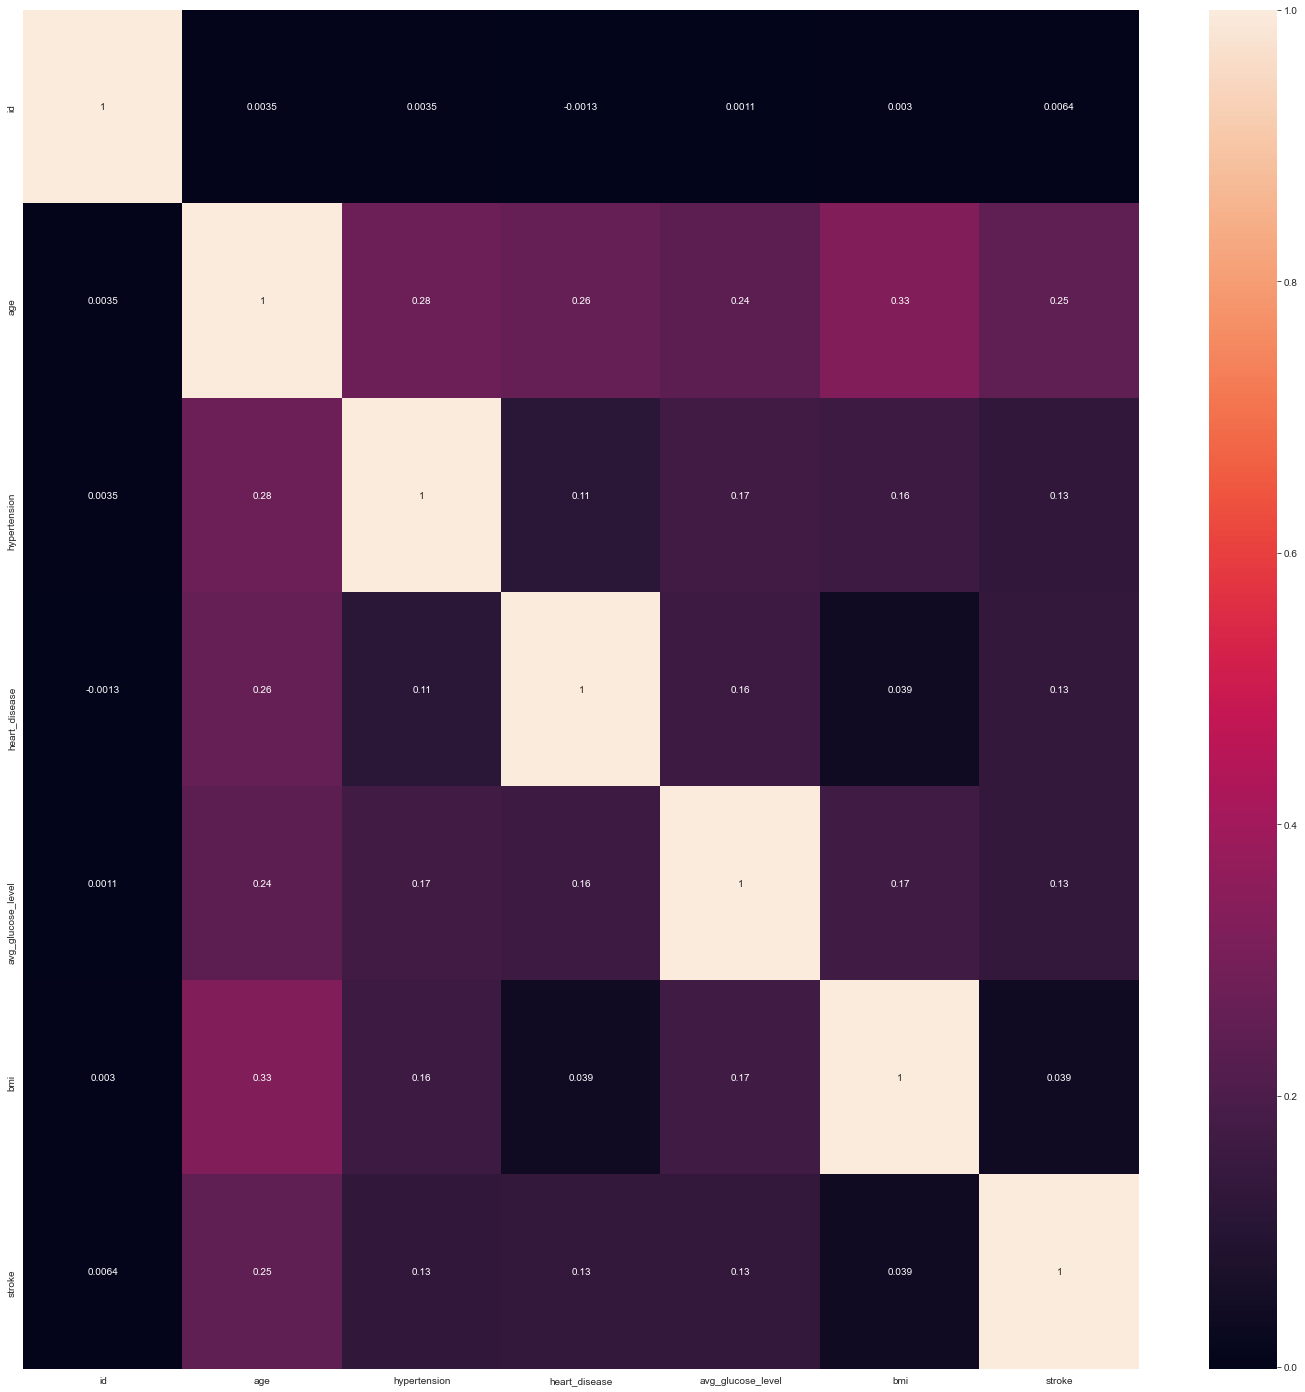

In [136]:
# Mapping correlation for dataset

plt.figure(figsize = (25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

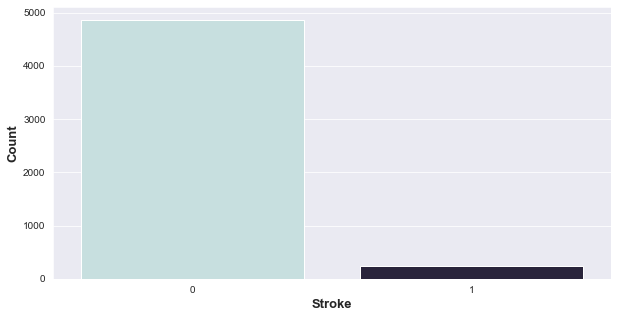

In [137]:
# Showing number of instances in output variable

plt.figure(figsize=(10,5))
sns.countplot(x = 'stroke',data = df,palette="ch:start=.2,rot=-.3")
plt.xlabel("Stroke",fontweight='bold',size=13)
plt.ylabel("Count",fontweight='bold',size=13)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

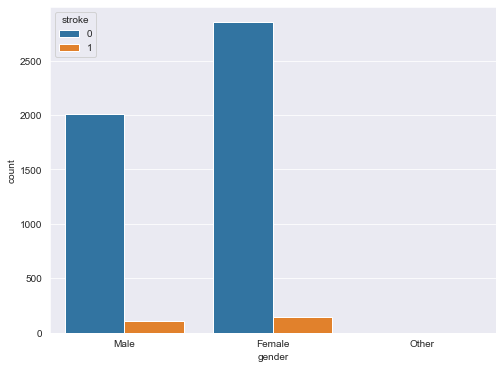

In [138]:
sns.countplot(df['gender'],hue=df['stroke'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hypertension', ylabel='count'>

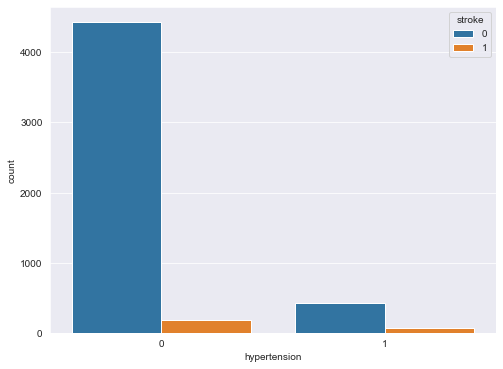

In [139]:
sns.countplot(df['hypertension'],hue=df['stroke'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='heart_disease', ylabel='count'>

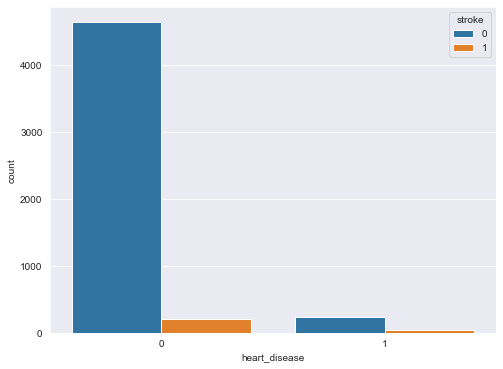

In [140]:
sns.countplot(df['heart_disease'],hue=df['stroke'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ever_married', ylabel='count'>

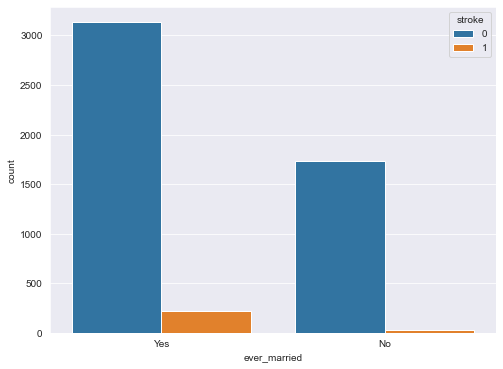

In [141]:
sns.countplot(df['ever_married'],hue=df['stroke'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='work_type', ylabel='count'>

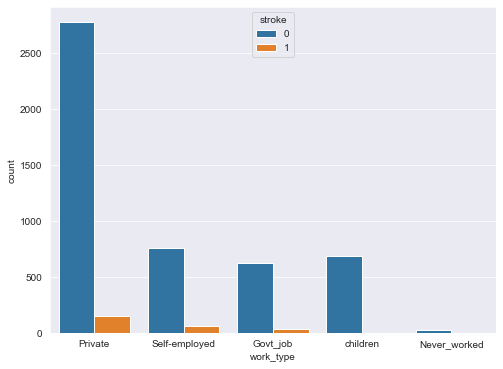

In [142]:
sns.countplot(df['work_type'],hue=df['stroke'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Residence_type', ylabel='count'>

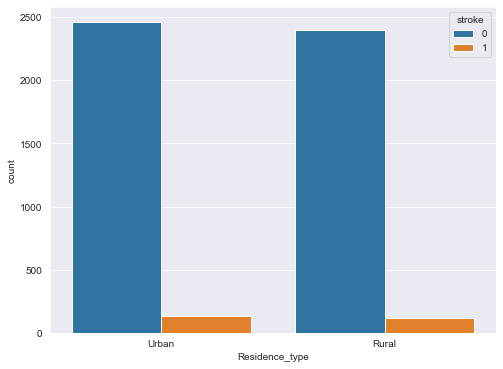

In [143]:
sns.countplot(df['Residence_type'],hue=df['stroke'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoking_status', ylabel='count'>

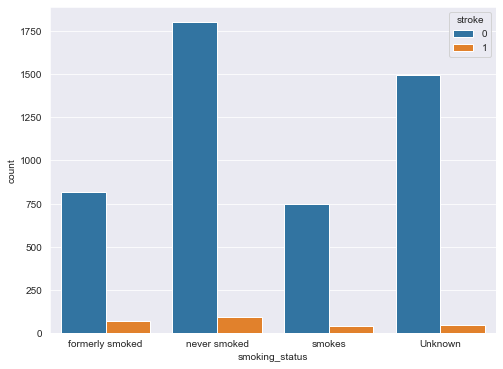

In [144]:
sns.countplot(df['smoking_status'],hue=df['stroke'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='avg_glucose_level', ylabel='Density'>

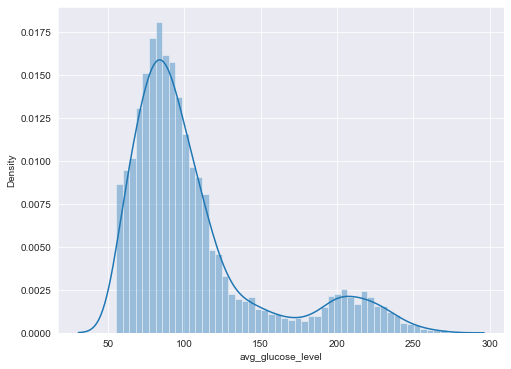

In [145]:
sns.distplot(df['avg_glucose_level'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

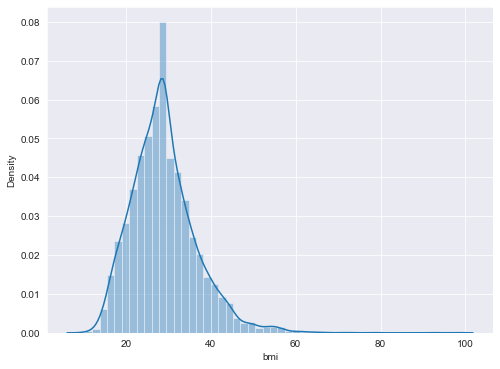

In [146]:
sns.distplot(df['bmi'])

# Label Encoding

In [147]:
from sklearn.preprocessing import LabelEncoder
col=['gender','ever_married','work_type','smoking_status','Residence_type']
le=LabelEncoder()
for i in col:
  df[i]=le.fit_transform(df[i])

In [148]:
df[i]

0       1
1       0
2       0
3       1
4       0
       ..
5105    1
5106    1
5107    0
5108    0
5109    1
Name: Residence_type, Length: 5110, dtype: int32

# 6. Prediction using ML

Now our data is explored and visualized. So its time for prediction using machine learning.

In [149]:
# Seperating Target variables and features
# Target Variable
y=df['stroke']
# Features
x=df.drop(['id','stroke'], axis=1)

In [150]:
x # To check input data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,0,79.0,1,0,1,3,0,174.12,24.000000,2
...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1


In [151]:
y # To check output data

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

# Splitting dataset into training and testing
Now, we will split dataset into the training and testing set. Here we have taken 20% data for testing and 80% data for training the model. The code for this is given below:

In [152]:
# Spliting the data in 80%, 20% for training and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.80,random_state=0)

In [153]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [154]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [155]:
pip install -U imbalanced-learn

  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
  Using cached scikit_learn-1.1.1-cp38-cp38-win_amd64.whl (7.3 MB)
  Attempting uninstall: joblib
    Found existing installation: joblib 0.17.0
    Uninstalling joblib-0.17.0:


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\joblib-0.17.0.dist-info\\direct_url.json'
Consider using the `--user` option or check the permissions.

In [156]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [157]:
!pip install imbalanced-learn==0.6.0

In [158]:
!pip install scikit-learn==0.22.1

  Using cached scikit_learn-0.22.1-cp38-cp38-win_amd64.whl (6.4 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\scikit_learn-0.23.2.dist-info\\COPYING'
Consider using the `--user` option or check the permissions.



In [159]:
# transform the dataset
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x_train, y_train = oversample.fit_resample(x_train, y_train)

# Training the model using logistic regression
Now in this step we fit our model to the training dataset using logistic regression. we are going to create an object of the class named as a model. The code for this is given below:

In [160]:
# Making the model using LogisticRegression()
model = LogisticRegression(random_state = 0)

# Fiting the training data in the model
model.fit(x_train,y_train)

print("Training completed.")

Training completed.


In [161]:
# Making predictions using the predict() and x_test data
predict = model.predict(x_test)

In [162]:
# Checking model accuracy

print("Accuracy: ", accuracy_score(y_test,predict))

Accuracy:  0.7798434442270059


Text(0.5, 34.0, 'Predicted Values')

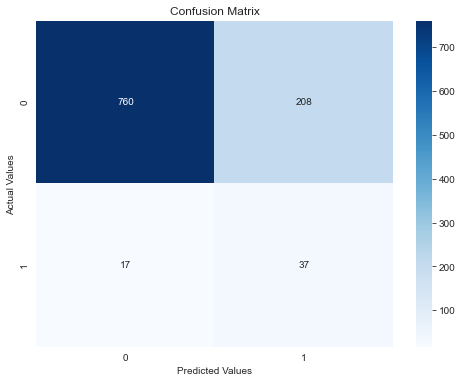

In [163]:
# Confusion matrix for Logistic Regression

cm=confusion_matrix(y_test,predict)
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")

# Training the model using Random Forest
Now in this step we fit our model to the training dataset using Random Forest. we are going to create an object of the class named as a model. The code for this is given below:

In [164]:
# Making the model using RandomForestClassifier()
model = RandomForestClassifier(n_estimators=100)

# Fiting the training data in the model
model.fit(x_train,y_train)

print("Training completed.")

Training completed.


In [165]:
# Making predictions using the predict() and x_test data
predict = model.predict(x_test)

In [166]:
# Checking model scores

print("Accuracy: ",accuracy_score(y_test,predict))

Accuracy:  0.9266144814090019


Text(0.5, 34.0, 'Predicted Values')

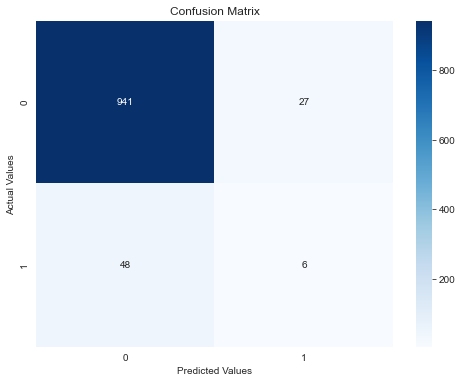

In [167]:
# Confusion matrix for Random Forest

cm=confusion_matrix(y_test,predict)
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")

# Training the model using KNN
Now in this step we fit our model to the training dataset using KNN. we are going to create an object of the class named as a model. The code for this is given below:

In [168]:
# Making the model using KNeighborsClassifier()
model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

# Fiting the training data in the model
model.fit(x_train,y_train)

print("Training completed.")

Training completed.


In [169]:
# Making predictions using the predict() and x_test data
predict = model.predict(x_test)

In [170]:
# Checking model score

print("Accuracy: ",accuracy_score(y_test,predict))

Accuracy:  0.815068493150685


Text(0.5, 34.0, 'Predicted Values')

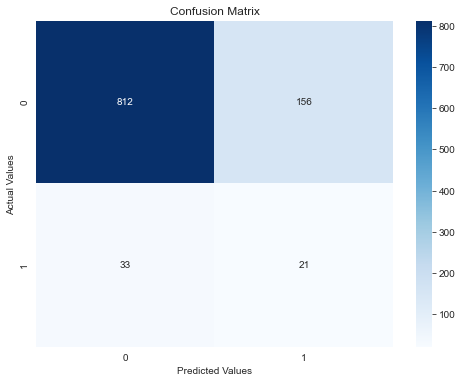

In [171]:
# Confusion matrix for KNN

cm=confusion_matrix(y_test,predict)
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")

# Training the model using Naive Bayes
Now in this step we fit our model to the training dataset using Naive Bayes. we are going to create an object of the class named as a model. The code for this is given below:

In [172]:
# Making the model using GaussianNB()
model = GaussianNB()

# Fiting the training data in the model
model.fit(x_train,y_train)

print("Training completed.")

Training completed.


In [173]:
# Making predictions using the predict() and x_test data
predict = model.predict(x_test)

In [174]:
print("Accuracy: ", accuracy_score(y_test,predict))

Accuracy:  0.7514677103718199


Text(0.5, 34.0, 'Predicted Values')

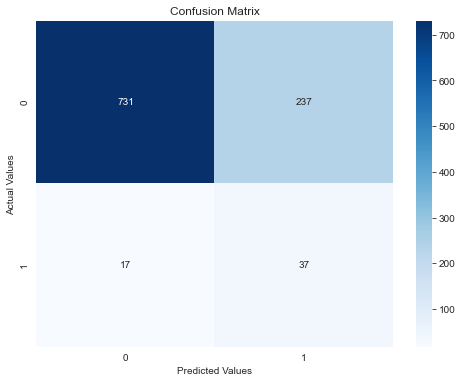

In [175]:
# Confusion matrix for Naive Bayes

cm=confusion_matrix(y_test,predict)
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")

# Training the model using Decision Tree
Now in this step we fit our model to the training dataset using Decision Tree. we are going to create an object of the class named as a model. The code for this is given below:

In [176]:
# Making the model using DecisionTreeClassifier()
model = DecisionTreeClassifier()

# Fiting the training data in the model
model.fit(x_train,y_train)

print("Training completed.")

Training completed.


In [177]:
# Making predictions using the predict() and x_test data
predict = model.predict(x_test)

In [178]:
print("Accuracy: ", accuracy_score(y_test,predict))

Accuracy:  0.8874755381604696


Text(0.5, 34.0, 'Predicted Values')

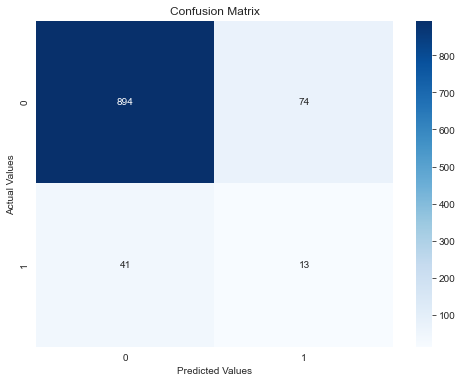

In [179]:
# Confusion matrix for Decision Tree

cm=confusion_matrix(y_test,predict)
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")

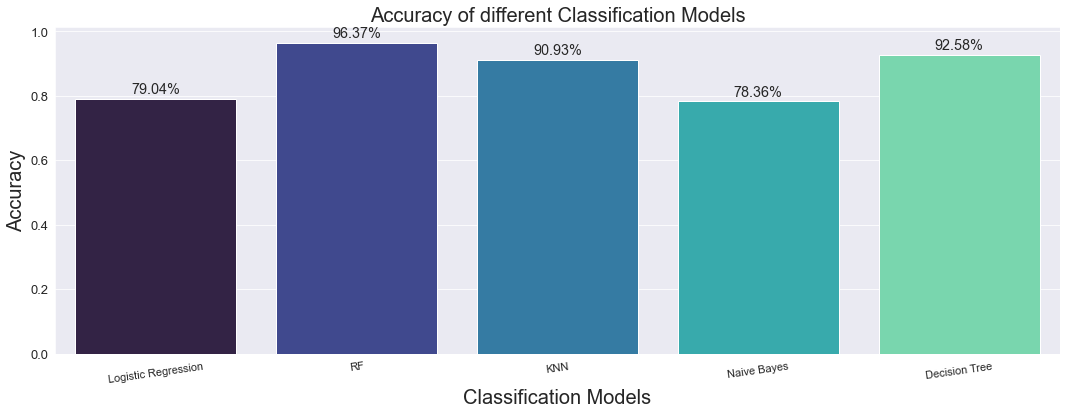

In [180]:
mylist=[]
mylist2=[]
mylist.append(lg)
mylist2.append("Logistic Regression")
mylist.append(rf)
mylist2.append("RF")
mylist.append(knn)
mylist2.append("KNN")
mylist.append(nb)
mylist2.append("Naive Bayes")
mylist.append(dt)
mylist2.append("Decision Tree")
plt.rcParams['figure.figsize']=8,6
sns.set_style("darkgrid")
plt.figure(figsize=(18,6))
ax = sns.barplot(x=mylist2, y=mylist, palette = "mako", saturation =1.5)
plt.xlabel("Classification Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different Classification Models", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

In [181]:
# https://colab.research.google.com/drive/1pC_EVmjF1mGokmQJqE0N25BmvExxqSYv?usp=sharing